In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection.csv')
df.shape

(5573, 1)

In [3]:
df.sample(5)

,"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
2996,ham\tThey released vday shirts and when u put ...
2739,ham\tAre you this much buzy
2252,ham\tDen wat will e schedule b lk on sun?
2161,ham\tIs she replying. Has boye changed his pho...
1818,ham\tAm i that much dirty fellow?


## 1. Data Cleaning

In [4]:
df = pd.read_csv('SMSSpamCollection.csv',names=['Category','Text'])
df.head()

,Category,Text
0,"ham\tGo until jurong point, crazy.. Available ...",NaN
1,ham\tOk lar... Joking wif u oni...,NaN
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,NaN
3,ham\tU dun say so early hor... U c already the...,NaN
4,"ham\tNah I don't think he goes to usf, he live...",NaN


In [5]:
df['Category'] = df['Category'].apply(lambda x : x.split('\t'))
df['Text'] = df['Category'].apply(lambda x : x[1])
df['Category'] = df['Category'].apply(lambda x : x[0])

In [6]:
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Category'] = encoder.fit_transform(df['Category'])

In [9]:
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [11]:
df.duplicated().sum()

414

In [12]:
'''REMOVING DUPLICATES'''
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5160, 2)

## 2. EDA

In [15]:
df['Category'].value_counts()

Category
0    4518
1     642
Name: count, dtype: int64

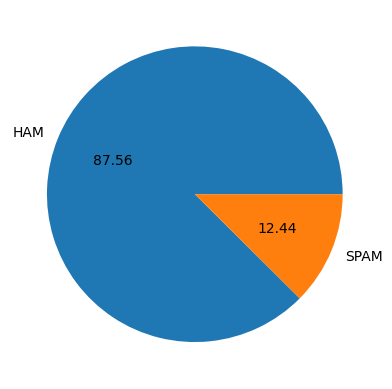

'DATA IS IMBALANCED'

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['HAM','SPAM'],autopct='%0.2f')
plt.show()
'''DATA IS IMBALANCED'''

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['No_of_chars']=df['Text'].apply(len)

C:\Users\Hardik\AppData\Local\Temp\ipykernel_20904\876696596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_chars']=df['Text'].apply(len)


In [20]:
df

,Category,Text,No_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160
5570,0,Will ü b going to esplanade fr home?,36
5571,0,"Pity, * was in mood for that. So...any other s...",57
5572,0,The guy did some bitching but I acted like i'd...,125


In [21]:
'''NUMBER OF WORDS'''
df['No_of_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\Hardik\AppData\Local\Temp\ipykernel_20904\1706779460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [22]:
df.head()

,Category,Text,No_of_chars,No_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['No_of_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Hardik\AppData\Local\Temp\ipykernel_20904\2693604507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [24]:
df

,Category,Text,No_of_chars,No_of_words,No_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5570,0,Will ü b going to esplanade fr home?,36,9,1
5571,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5572,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df[['No_of_chars','No_of_words','No_of_sentences']].describe()

,No_of_chars,No_of_words,No_of_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.141279,18.581395,1.970543
std,58.289387,13.390781,1.455918
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
'''HAM'''
df[df['Category']==0][['No_of_chars','No_of_words','No_of_sentences']].describe()

,No_of_chars,No_of_words,No_of_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.860779,17.282205,1.827579
std,56.584730,13.572746,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
'''SPAM'''
df[df['Category']==1][['No_of_chars','No_of_words','No_of_sentences']].describe()

,No_of_chars,No_of_words,No_of_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.976636
std,29.975596,7.028380,1.484527
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='No_of_chars', ylabel='Count'>

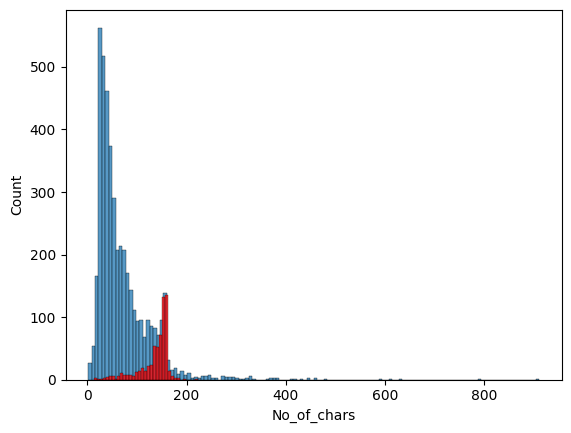

In [29]:
sns.histplot(df[df['Category']==0]['No_of_chars'])
sns.histplot(df[df['Category']==1]['No_of_chars'],color='red')

<Axes: xlabel='No_of_words', ylabel='Count'>

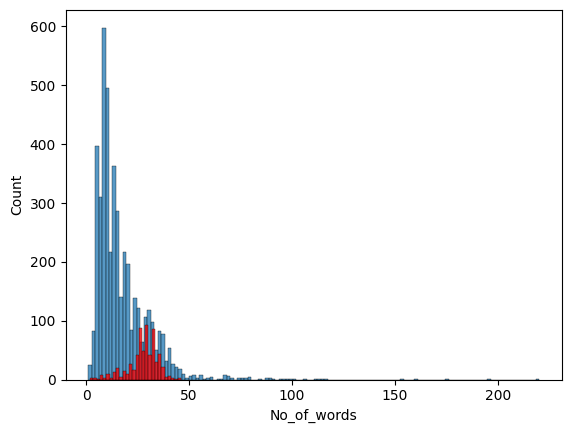

In [30]:
sns.histplot(df[df['Category']==0]['No_of_words'])
sns.histplot(df[df['Category']==1]['No_of_words'],color='red')

C:\Users\Hardik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


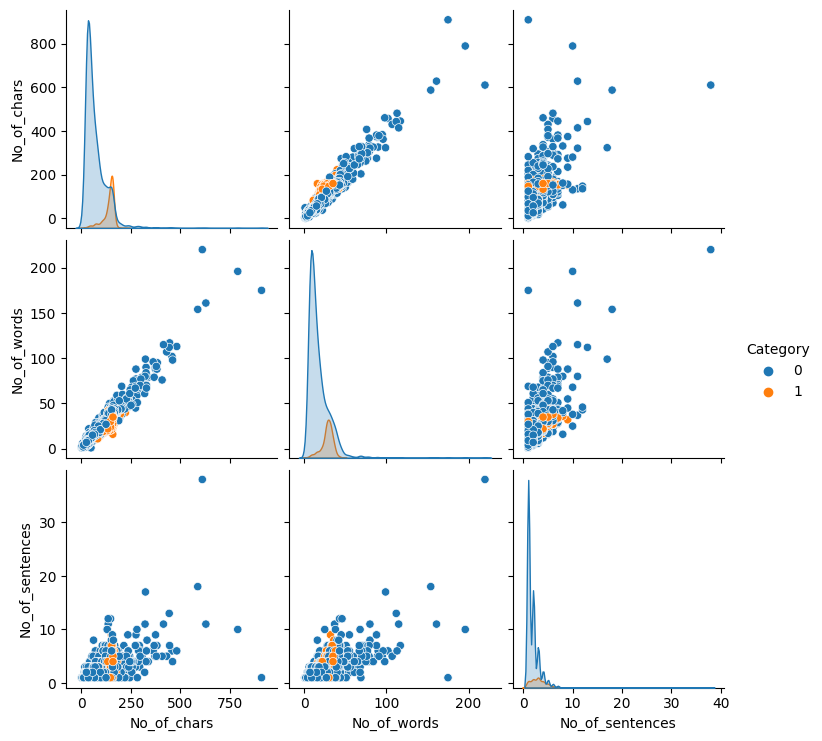

In [31]:
sns.pairplot(df,hue='Category')

In [32]:
df

,Category,Text,No_of_chars,No_of_words,No_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5570,0,Will ü b going to esplanade fr home?,36,9,1
5571,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5572,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

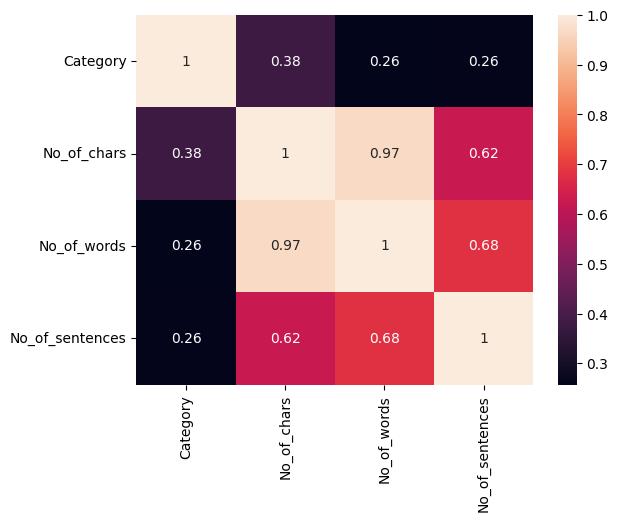

In [33]:
sns.heatmap(df[['Category','No_of_chars','No_of_words','No_of_sentences']].corr(),annot=True)

## 3. Text Preprocessing
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hardik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [38]:
transform_text('Hi, I loved your YT lectures on Machine Learning. What should I do after this? ')

'hi love yt lectur machin learn'

In [39]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

C:\Users\Hardik\AppData\Local\Temp\ipykernel_20904\833893575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Text'] = df['Text'].apply(transform_text)


In [40]:
df

,Category,Text,No_of_chars,No_of_words,No_of_sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5570,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5571,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5572,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['Category']==1]['Transformed_Text'].str.cat(sep=" "))

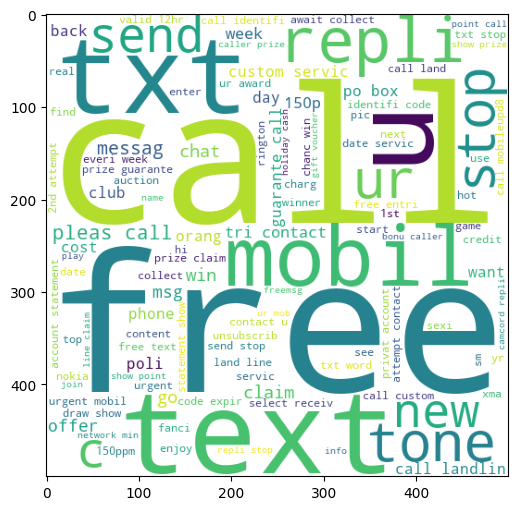

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc = wc.generate(df[df['Category']==0]['Transformed_Text'].str.cat(sep=" "))

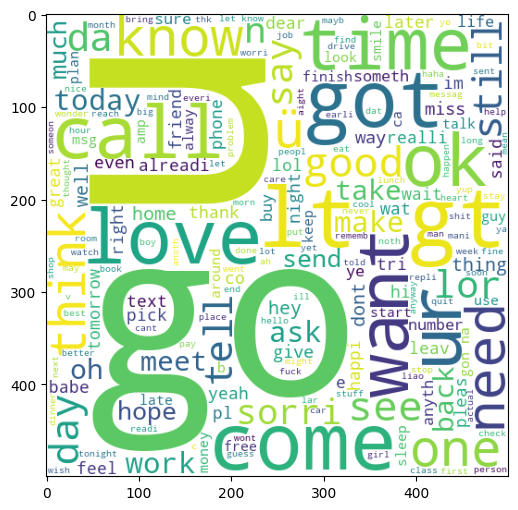

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus = []
for msg in df[df['Category'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9808

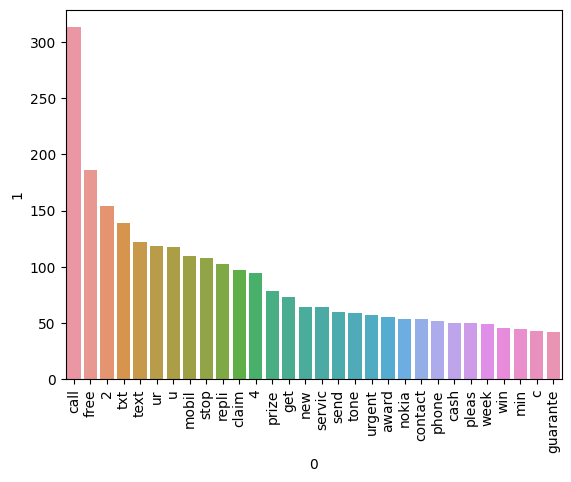

In [48]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_corpus = []
for msg in df[df['Category'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35937

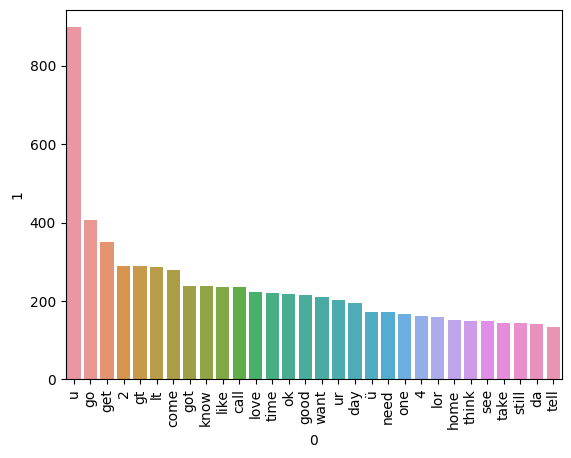

In [51]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [53]:
X = cv.fit_transform(df['Transformed_Text']).toarray()

In [54]:
X.shape

(5160, 6782)

In [55]:
y = df['Category'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.875
[[803 113]
 [ 16 100]]
0.4694835680751174


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825581395348837
[[906  10]
 [  8 108]]
0.9152542372881356


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748062015503876
[[913   3]
 [ 23  93]]
0.96875


In [64]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8711240310077519
[[801 115]
 [ 18  98]]
0.460093896713615


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[916   0]
 [ 25  91]]
1.0


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835271317829457
[[913   3]
 [ 14 102]]
0.9714285714285714


In [69]:
'''WE WILL GO WITH TFIDF --> BNB AS IT HAS THE MAX. PRECISION AND THE DATASET IS HIGHLY IMBALANCED'''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738372093023255, 0.9587628865979382)

In [74]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738372093023255
Precision -  0.9587628865979382
For  KN
Accuracy -  0.9234496124031008
Precision -  0.9743589743589743
For  NB
Accuracy -  0.9757751937984496
Precision -  1.0
For  DT
Accuracy -  0.9476744186046512
Precision -  0.8875
For  LR
Accuracy -  0.9515503875968992
Precision -  0.8837209302325582
For  RF
Accuracy -  0.9728682170542635
Precision -  0.9888888888888889
For  AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.9019607843137255
For  BgC
Accuracy -  0.9680232558139535
Precision -  0.9029126213592233
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9603960396039604
For  GBDT
Accuracy -  0.9525193798449613
Precision -  0.9466666666666667
For  xgb
Accuracy -  0.9699612403100775
Precision -  0.9292929292929293


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.975775,1.000000
5,RF,0.972868,0.988889
1,KN,0.923450,0.974359
8,ETC,0.977713,0.960396
0,SVC,0.973837,0.958763
9,GBDT,0.952519,0.946667
10,xgb,0.969961,0.929293
7,BgC,0.968023,0.902913
6,AdaBoost,0.967054,0.901961
3,DT,0.947674,0.887500


In [77]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.975775
1,RF,Accuracy,0.972868
2,KN,Accuracy,0.923450
3,ETC,Accuracy,0.977713
4,SVC,Accuracy,0.973837
5,GBDT,Accuracy,0.952519
6,xgb,Accuracy,0.969961
7,BgC,Accuracy,0.968023
8,AdaBoost,Accuracy,0.967054
9,DT,Accuracy,0.947674


C:\Users\Hardik\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


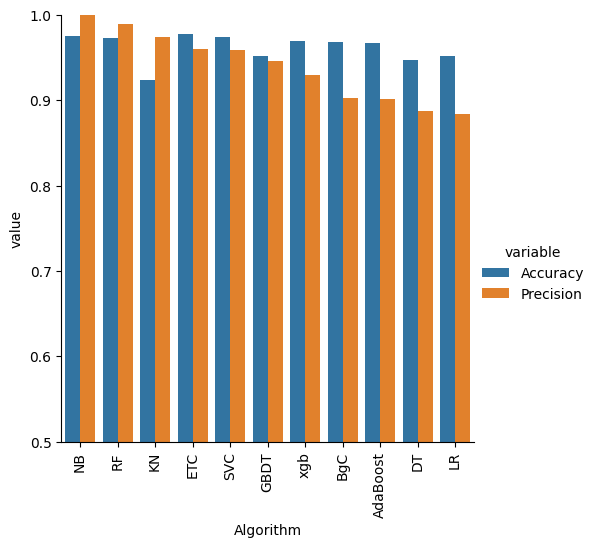

In [78]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))